In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os
from scipy.stats import linregress

xfmt = ScalarFormatter()
xfmt.set_powerlimits((6,6))
xfmt.useMathText = True

#os.system("source ~/software/root6/build/bin/thisroot.sh")
import ROOT as root

Welcome to JupyROOT 6.18/00


In [12]:
data_dir = "/home/watchman/Documents/lappdsoft/lappd/data/gain"

In [13]:


def pyhist(data, fit=False, bins=None, binwidth=1, xlims=None, title="", xlabel="", ylabel=""):
    if bins is None:
        mindata = min(data)
        maxdata = max(data)
        histbins = np.arange(mindata, maxdata + binwidth, binwidth)
    else:
        histbins=bins
    plt.hist(data, bins=histbins, histtype="step")
    plt.xlabel(xlabel, loc="right")
    plt.ylabel(ylabel, loc="top")
    plt.title(title)

In [14]:
pc_voltages = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
mcp_voltages = [800, 825, 850, 875]

gain = {}
height = {}

for mcp_voltage in mcp_voltages:
    gain[mcp_voltage] = {}
    height[mcp_voltage] = {}
    for pc_voltage in pc_voltages:
        try:
            gain[mcp_voltage][pc_voltage] = np.load(f"{data_dir}/MCP{mcp_voltage}/PC{pc_voltage}_gain.npy")
            height[mcp_voltage][pc_voltage] = np.load(f"{data_dir}/MCP{mcp_voltage}/PC{pc_voltage}_heights.npy")
        except FileNotFoundError:
            print(f"Could not find file for MCP voltage {mcp_voltage} and photocathode voltage {pc_voltage}")

Could not find file for MCP voltage 875 and photocathode voltage 150
Could not find file for MCP voltage 875 and photocathode voltage 200


In [15]:
gain_binmin = -4e6
gain_binmax = 2.5e7
gain_bin_width = 0.2e6
heights_binmin = 0
heights_binmax = 150
heights_binwidth = 0.5
gain_bins = np.arange(gain_binmin, gain_binmax, gain_bin_width)
height_bins = np.arange(heights_binmin, heights_binmax, heights_binwidth)

Plotting 800 MCP and 200 PC
Plotting 825 MCP and 200 PC
Plotting 850 MCP and 200 PC
Plotting 875 MCP and 200 PC


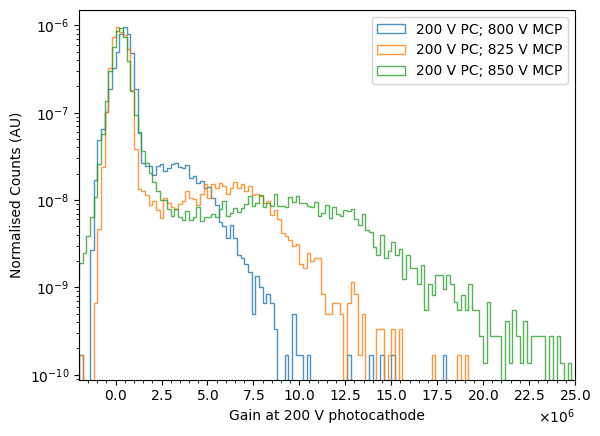

In [16]:
def plot_hist(mcp, pc):
    print(f"Plotting {mcp} MCP and {pc} PC")
    try:
        plt.hist(gain[mcp][pc], gain_bins, histtype="step", label=f"{pc} V PC; {mcp} V MCP", density=True, alpha=0.8)
    except KeyError:
        pass

vec_plot_hist = np.vectorize(plot_hist, otypes=[None])

# plt.hist(gain[800][200], gain_bins, histtype="step", label="800V MCP", density=True, alpha=0.8)
# plt.hist(gain[825][200], gain_bins, histtype="step", label="825V MCP", density=True, alpha=0.8)
# plt.hist(gain[850][200], gain_bins, histtype="step", label="850V MCP", density=True, alpha=0.8)

vec_plot_hist(mcp_voltages, 200)
plt.xlabel("Gain at 200 V photocathode")
plt.ylabel("Normalised Counts (AU)")
plt.yscale("log")
plt.xlim(-2e6, 2.5e7)
plt.minorticks_on()
# plt.ylim(0, 2e-8)
plt.xticks(np.arange(-0e6, 2.51e7, 2.5e6))
plt.legend()
plt.gca().xaxis.set_major_formatter(xfmt)
plt.show()


[3847546.96919872 3970523.96463454 4284566.85374059 5166944.68028121
 5426349.45612731 5919776.1023234  6061351.24029229 6640709.75963949
 7732294.68402121 7434023.77250342       0.               0.        ]


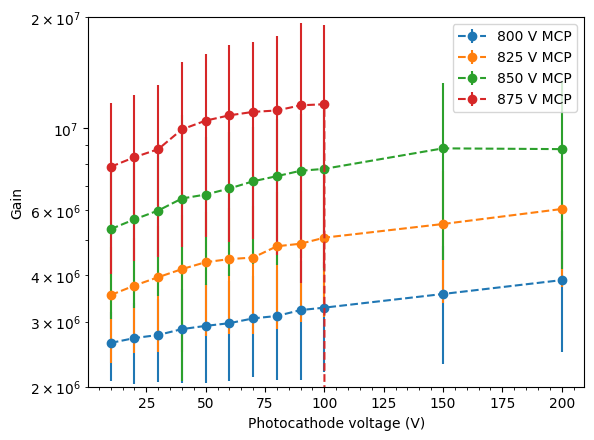

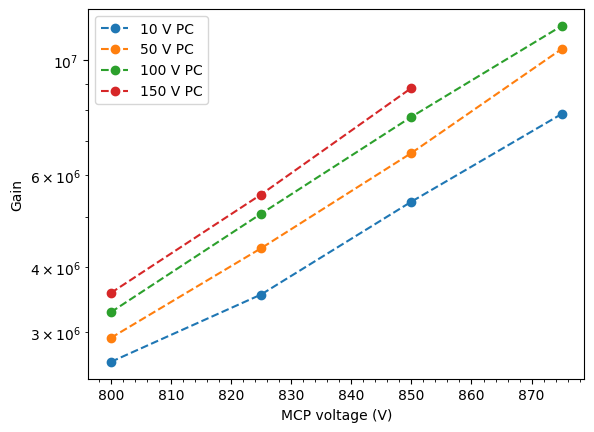

In [17]:
@np.vectorize
def get_coarse_mean(mcp, pc, pedestal):
    try:
        return np.mean(gain[mcp][pc][gain[mcp][pc] > pedestal])
    except KeyError:
        return 0

@np.vectorize
def get_coarse_std(mcp, pc, pedestal):
    try:
        return np.std(gain[mcp][pc][gain[mcp][pc] > pedestal])
    except KeyError:
        return 0

print(get_coarse_std(875, pc_voltages, 2e6))
plt.errorbar(pc_voltages, get_coarse_mean(800, pc_voltages, 2e6), yerr=get_coarse_std(800, pc_voltages, 2e6), linestyle="--", marker="o", label="800 V MCP")
plt.errorbar(pc_voltages, get_coarse_mean(825, pc_voltages, 2e6), yerr=get_coarse_std(825, pc_voltages, 2e6), linestyle="--", marker="o", label="825 V MCP")
plt.errorbar(pc_voltages, get_coarse_mean(850, pc_voltages, 2e6), yerr=get_coarse_std(850, pc_voltages, 2e6), linestyle="--", marker="o", label="850 V MCP")
plt.errorbar(pc_voltages, get_coarse_mean(875, pc_voltages, 2e6), yerr=get_coarse_std(875, pc_voltages, 2e6), linestyle="--", marker="o", label="875 V MCP")
plt.legend()
plt.gca().yaxis.set_major_formatter(xfmt)
plt.ylim(2e6, 2e7)
plt.minorticks_on()
plt.yscale("log")
plt.xlabel("Photocathode voltage (V)")
plt.ylabel("Gain")
plt.show()

plt.plot(mcp_voltages, get_coarse_mean(mcp_voltages, 10, 2e6), "o--", label="10 V PC")
plt.plot(mcp_voltages, get_coarse_mean(mcp_voltages, 50, 2e6), "o--", label="50 V PC")
plt.plot(mcp_voltages, get_coarse_mean(mcp_voltages, 100, 2e6), "o--", label="100 V PC")
plt.plot(mcp_voltages[:-1], get_coarse_mean(mcp_voltages[:-1], 150, 2e6), "o--", label="150 V PC")
plt.xlabel("MCP voltage (V)")
plt.ylabel("Gain")
plt.yscale("log")
plt.minorticks_on()
# plt.yticks(np.arange(1e6, 1.1e7, 2e6), np.arange(1e6, 1.1e7, 2e6))
plt.legend()
plt.show()

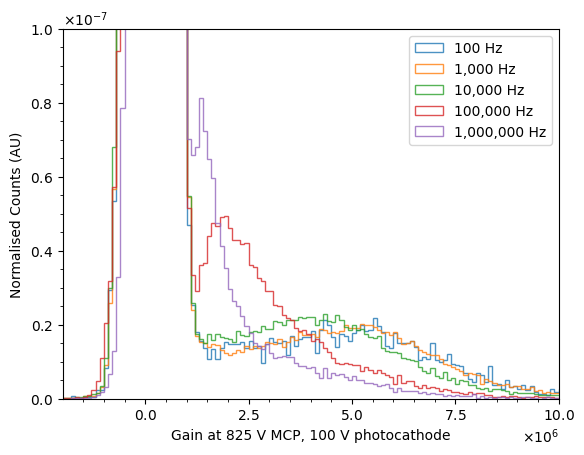

In [18]:
laser_rates = [100, 1000, 10000, 100000, 1000000]
laser_mcp = 825
laser_pc = 100

gain_bins = np.arange(gain_binmin, gain_binmax, 1e5)

laser_gain = {}
laser_height = {}
for rate in laser_rates:
    laser_gain[rate] = np.load(f"{data_dir}/laser_rate/{rate}hz_gain.npy")
    laser_height[rate] = np.load(f"{data_dir}/laser_rate/{rate}hz_heights.npy")

plt.hist(laser_gain[100], gain_bins, histtype="step", label="100 Hz", density=True, alpha=0.8)
plt.hist(laser_gain[1000], gain_bins, histtype="step", label="1,000 Hz", density=True, alpha=0.8)
plt.hist(laser_gain[10000], gain_bins, histtype="step", label="10,000 Hz", density=True, alpha=0.8)
plt.hist(laser_gain[100000], gain_bins, histtype="step", label="100,000 Hz", density=True, alpha=0.8)
plt.hist(laser_gain[1000000], gain_bins, histtype="step", label="1,000,000 Hz", density=True, alpha=0.8)

plt.xlabel("Gain at 825 V MCP, 100 V photocathode")
plt.ylabel("Normalised Counts (AU)")
# plt.yscale("log")
plt.xlim(-2e6, 1.0e7)
plt.ylim(0, 10e-8)
plt.xticks(np.arange(-0e6, 1.1e7, 2.5e6))
plt.minorticks_on()
plt.legend()
plt.gca().xaxis.set_major_formatter(xfmt)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.legend()
plt.show()

Plotting 800 MCP and 100 PC
Plotting 825 MCP and 100 PC
Plotting 850 MCP and 100 PC
Plotting 875 MCP and 100 PC


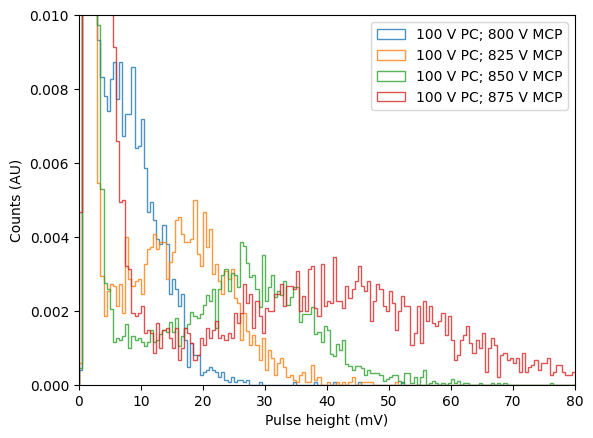

In [19]:
def plot_hist(mcp, pc):
    print(f"Plotting {mcp} MCP and {pc} PC")
    try:
        plt.hist(height[mcp][pc], height_bins, histtype="step", label=f"{pc} V PC; {mcp} V MCP", density=True, alpha=0.8)
    except KeyError:
        pass

vec_plot_hist = np.vectorize(plot_hist, otypes=[None])
vec_plot_hist(mcp_voltages, 100)
plt.xlabel("Pulse height (mV)")
plt.ylabel("Counts (AU)")
plt.ylim(0, 0.01)
plt.xlim(0,80)
plt.legend()
plt.show()

LinregressResult(slope=2.0661986181328684, intercept=7.224869695512737, rvalue=0.8189575790064514, pvalue=0.0, stderr=0.02666089556706305, intercept_stderr=0.7659502267776578)


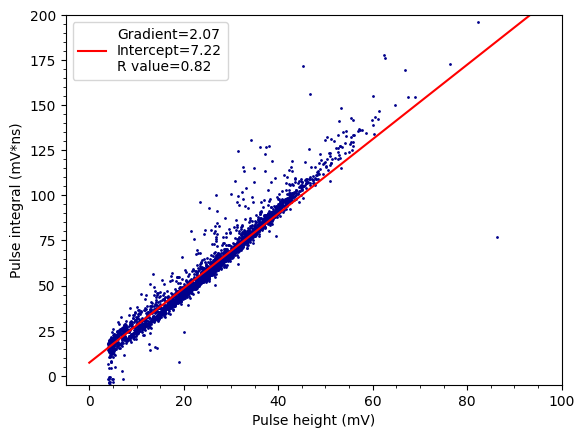

In [37]:
x_data = height[850][100]
y_data = gain[850][100] *1e3/1e-9*50*1.6e-19

result = linregress(x_data[x_data>4], y_data[x_data>4])

x_fit = np.arange(0, 200, 1)
y_fit = result.slope * x_fit + result.intercept
print(result)

plt.scatter(x_data[x_data>4], y_data[x_data>4], s=1, c="darkblue")
plt.plot(x_fit, y_fit, c="red", label=f"Gradient={result.slope:.2f}\nIntercept={result.intercept:.2f}\nR value={result.rvalue:.2f}")
plt.xlim(-5, 100)
plt.ylim(-5, 200)
plt.xlabel("Pulse height (mV)")
plt.ylabel("Pulse integral (mV*ns)")
plt.legend()
plt.minorticks_on()
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


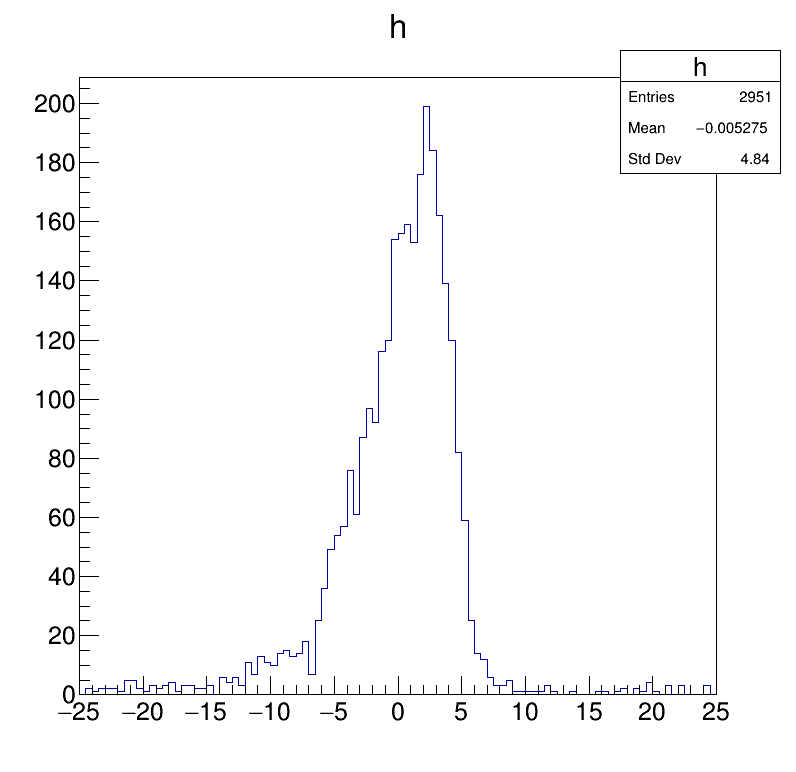

In [46]:
canvas = root.TCanvas("c", "c", 800, 800)
hist = root.TH1F("h", "h", 100, -25, 25)
for a,b in zip(result.slope*x_data[x_data>4]+result.intercept, y_data[x_data>4]):
    hist.Fill(a-b)
hist.Draw()
canvas.Draw()

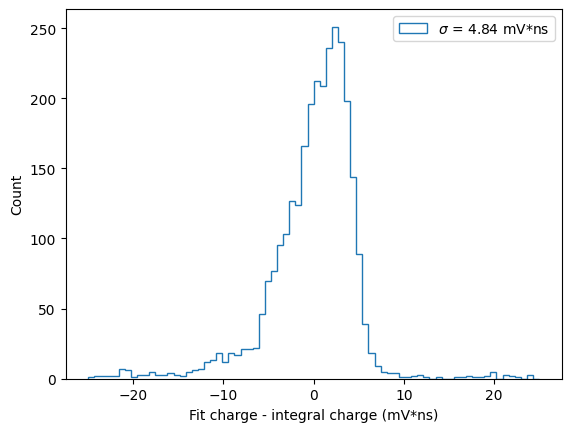

In [55]:
plt.hist(result.slope*x_data[x_data>4]+result.intercept - y_data[x_data>4], bins=np.linspace(-25, 25, 75), histtype="step", label="$\sigma$ = 4.84 mV*ns")
plt.xlabel("Fit charge - integral charge (mV*ns)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [20]:
print("Finished")

Finished
